# Support Vector Machines for Winner Prediction

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [4]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10,20568,16400,Blade Storm,128,128,140,2001,Protoss,105,...,0,1,0,0,0,0,1,2,0,80
1,GG10042,28603,22800,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,1,1,0,0,0,0,1,2,1,163
2,GG10043,34851,27800,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,1,1,0,0,0,0,1,2,2,162
3,GG10056,37973,30300,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,2,3,0,0,0,0,1,1,3,70
4,GG1010,38455,30700,Gauntlet2003,128,96,166,4463,Protoss,151,...,2,1,1,0,0,0,1,2,4,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,TL89,30124,24000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
360,TL900,53788,43000,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,1,0,0,0,0,1,360,82
361,TL937,34624,27600,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,1,3,0,0,0,0,0,2,361,41
362,TL959,49197,39300,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [5]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [7]:
#Create a svm Classifier
ml = svm.SVC() # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

In [9]:
# Model Accuracy
ml.score(X_test,y_test)

0.6272727272727273

In [10]:
confusion_matrix(y_test,y_pred)

array([[14, 35],
       [ 6, 55]], dtype=int64)

In [12]:
#Create a svm Classifier
ml = svm.SVC(C=100, gamma=0.0001, kernel="linear") # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

In [13]:
# Model Accuracy
ml.score(X_test,y_test)

0.7454545454545455

In [14]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        49
           2       0.77      0.77      0.77        61

    accuracy                           0.75       110
   macro avg       0.74      0.74      0.74       110
weighted avg       0.75      0.75      0.75       110



In [15]:
confusion_matrix(y_test,y_pred)

array([[35, 14],
       [14, 47]], dtype=int64)

# GridSearch for Parameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','linear']} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.490 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 1.0min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.725 total time= 1.8min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time= 3.1min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time= 2.2min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.780 total time=  36.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

: 

In [26]:
#Create a svm Classifier
ml = svm.SVC(C=0.1, gamma=1, kernel="linear") # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)
# Model Accuracy
ml.score(X_test,y_test)

0.7545454545454545

# LinearSVC

In [24]:
#Create a svm Classifier
ml = svm.LinearSVC(C=0.00001, random_state=42, dual="auto",max_iter=1000) # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

# Model Accuracy
ml.score(X_test,y_test)

0.7909090909090909

# Cross Validation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.89189189 0.86486486 0.67567568 0.83783784 0.94444444 0.86111111
 0.75       0.88888889 0.80555556 0.77777778]
Mean accuracy: 0.8298048048048049
Standard deviation of accuracy: 0.07495414434429237


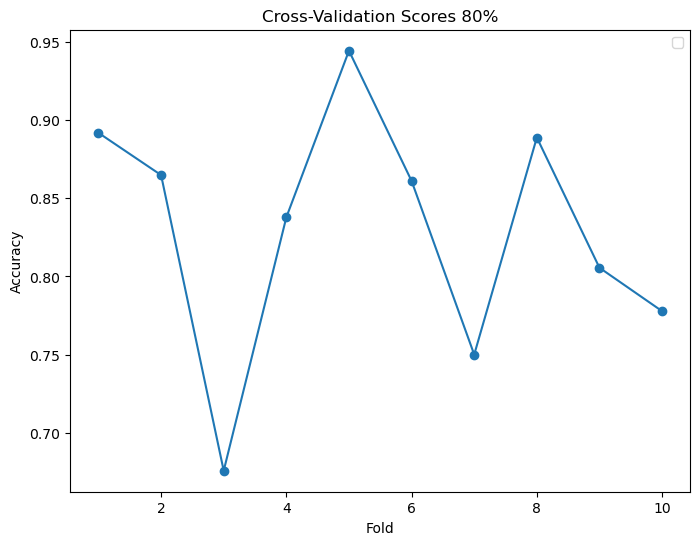

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(ml, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()
